In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("data/diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


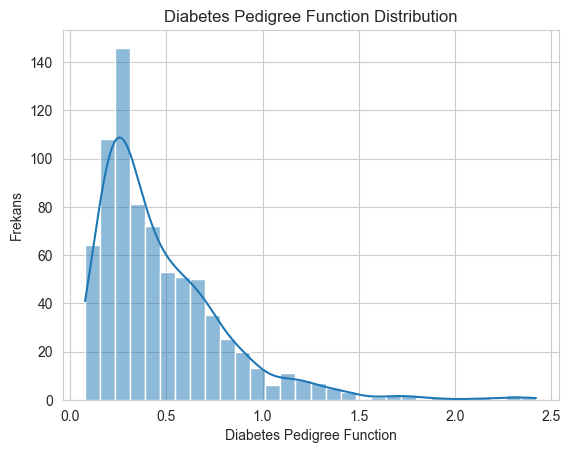

In [4]:
sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('Diabetes Pedigree Function Distribution')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frekans')
plt.show()

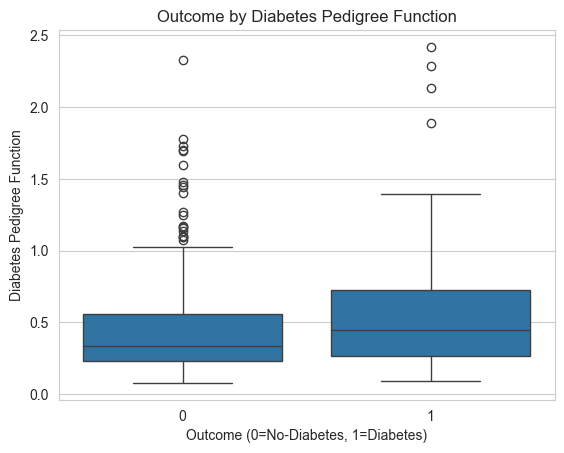

In [5]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Outcome by Diabetes Pedigree Function')
plt.xlabel('Outcome (0=No-Diabetes, 1=Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

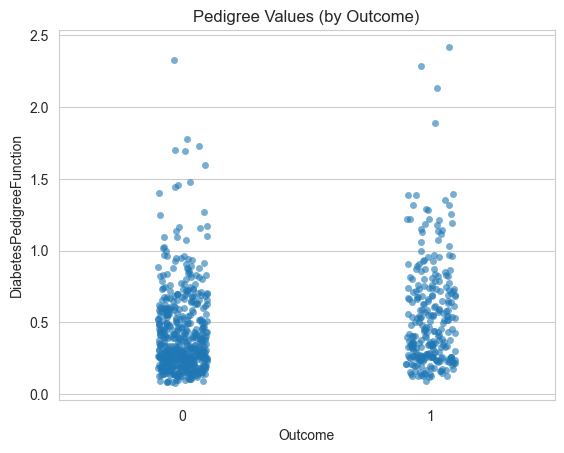

In [6]:
sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, jitter=True, alpha=0.6)
plt.title('Pedigree Values (by Outcome)')
plt.show()

In [7]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [8]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
medians = {}
for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0, median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def calculate_model_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

models = {
    "Linear Regression" : LinearRegression(),
    "Lasso": Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor"  : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

In [10]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")

    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

LinearRegression()
Evaluation for Training Set
RMSE : 0.3881630393732767
Mean Absolute Error : 0.3201424923762773
R2 Score : 0.34728129212742553
-----------------------------
Evaluation for Test Set
RMSE : 0.41555763403600315
Mean Absolute Error : 0.334908288939079
R2 Score : 0.17562960967632313
-----------------------------


Lasso()
Evaluation for Training Set
RMSE : 0.41549484639197815
Mean Absolute Error : 0.36120954114285103
R2 Score : 0.25212505564272913
-----------------------------
Evaluation for Test Set
RMSE : 0.4156005400301165
Mean Absolute Error : 0.35465888123043154
R2 Score : 0.17545936971824416
-----------------------------


Ridge()
Evaluation for Training Set
RMSE : 0.3881641888251092
Mean Absolute Error : 0.3201746568001768
R2 Score : 0.34727742638159365
-----------------------------
Evaluation for Test Set
RMSE : 0.41534212928856523
Mean Absolute Error : 0.3347754159825288
R2 Score : 0.1764844112865892
-----------------------------


KNeighborsRegressor()
Evaluation

In [11]:
# hypertuning

In [12]:
rf_params = {
        "max_depth" : [5,8,10,15,None],
        "max_features" : ["sqrt", "log2", 5, 7, 10],
        "min_samples_split" : [2, 8, 12, 20],
        "n_estimators" : [100, 200, 500, 1000]
}

from sklearn.model_selection import RandomizedSearchCV
randomcv_models = [
    ("RF", RandomForestRegressor(), rf_params)
        ]

for name, model, params in randomcv_models:
    randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter = 100, cv = 3, n_jobs = -1)
    randomcv.fit(X_train, y_train)
    print("best params for :", name, randomcv.best_params_)

models = {
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=500,
                                                     min_samples_split=2,
                                                      max_features=7,
                                                      max_depth = None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")

    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

best params for : RF {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 5}
RandomForestRegressor(max_features=7, n_estimators=500)
Evaluation for Training Set
RMSE : 0.14595930002519075
Mean Absolute Error : 0.11012377850162866
R2 Score : 0.9077085977201691
-----------------------------
Evaluation for Test Set
RMSE : 0.4241185818006226
Mean Absolute Error : 0.31246753246753245
R2 Score : 0.14131385507246386
-----------------------------


